In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


📄 File: tube4.csv
Confusion Matrix:
[[33228   200]
 [24809   683]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.99      0.73     33428
           1       0.77      0.03      0.05     25492

    accuracy                           0.58     58920
   macro avg       0.67      0.51      0.39     58920
weighted avg       0.66      0.58      0.43     58920

Accuracy: 0.5755
--------------------------------------------------


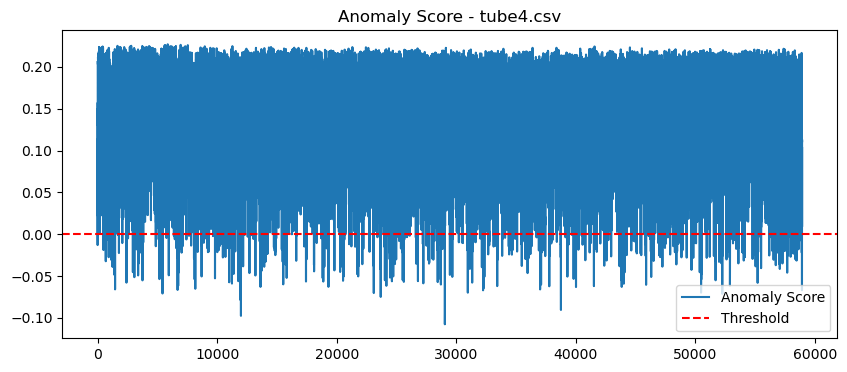

📄 File: tube5.csv
Confusion Matrix:
[[181730   1579]
 [148508   2925]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.99      0.71    183309
           1       0.65      0.02      0.04    151433

    accuracy                           0.55    334742
   macro avg       0.60      0.51      0.37    334742
weighted avg       0.60      0.55      0.40    334742

Accuracy: 0.5516
--------------------------------------------------


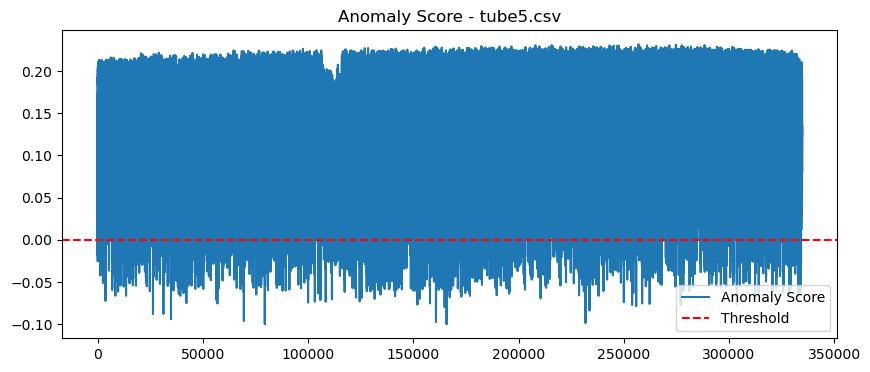

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

train_files = ['tube1.csv', 'tube2.csv', 'tube3.csv']
test_files = ['tube4.csv', 'tube5.csv']

features = ['f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16']

train_data = pd.concat([pd.read_csv(f)[features] for f in train_files], ignore_index=True)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)

clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
clf.fit(X_train_scaled)

for file in test_files:
    df = pd.read_csv(file)
    test_data = df[features]
    X_test_scaled = scaler.transform(test_data)

    preds = clf.predict(X_test_scaled)  # -1 是异常
    scores = clf.decision_function(X_test_scaled)

    df['anomaly'] = preds
    df['anomaly_score'] = scores

    df['label'] = (df['f7'] * df['f8'] > 0.1).astype(int)

    df['predicted_label'] = (df['anomaly'] == -1).astype(int)


    print(f"📄 File: {file}")
    print("Confusion Matrix:")
    print(confusion_matrix(df['label'], df['predicted_label']))
    print("\nClassification Report:")
    print(classification_report(df['label'], df['predicted_label']))
    print(f"Accuracy: {accuracy_score(df['label'], df['predicted_label']):.4f}")
    print("-" * 50)

    df.to_csv(f'anomaly_result_{file}', index=False)

    plt.figure(figsize=(10, 4))
    plt.plot(df['anomaly_score'], label='Anomaly Score')
    plt.axhline(y=0, color='red', linestyle='--', label='Threshold')
    plt.title(f'Anomaly Score - {file}')
    plt.legend()
    plt.show()


📄 File: tube4.csv
Confusion Matrix:
[[53822   593]
 [ 4215   290]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     54415
           1       0.33      0.06      0.11      4505

    accuracy                           0.92     58920
   macro avg       0.63      0.53      0.53     58920
weighted avg       0.88      0.92      0.89     58920

Accuracy: 0.9184
--------------------------------------------------


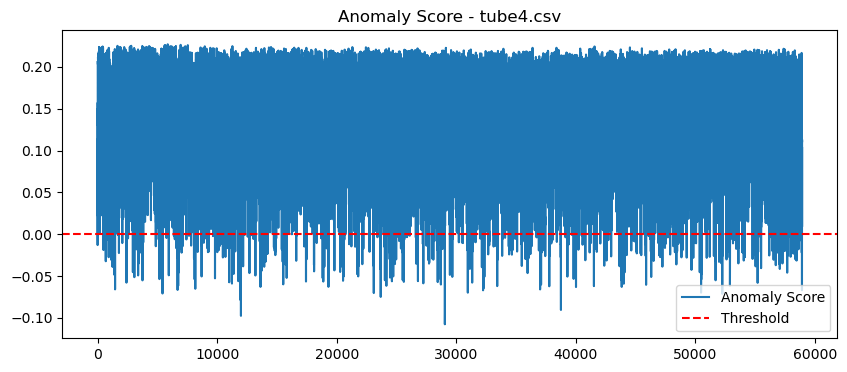

📄 File: tube5.csv
Confusion Matrix:
[[302713   2456]
 [ 27525   2048]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    305169
           1       0.45      0.07      0.12     29573

    accuracy                           0.91    334742
   macro avg       0.69      0.53      0.54    334742
weighted avg       0.88      0.91      0.88    334742

Accuracy: 0.9104
--------------------------------------------------


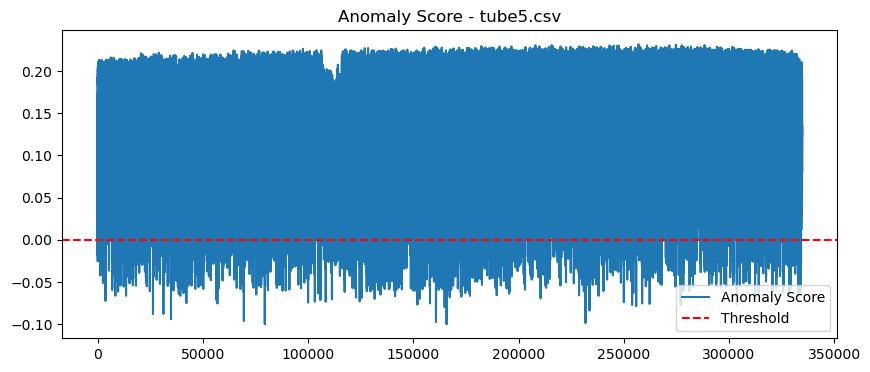

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


train_files = ['tube1.csv', 'tube2.csv', 'tube3.csv']
test_files = ['tube4.csv', 'tube5.csv']

features = ['f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16']


train_data = pd.concat([pd.read_csv(f)[features] for f in train_files], ignore_index=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)


clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
clf.fit(X_train_scaled)

for file in test_files:
    df = pd.read_csv(file)
    test_data = df[features]
    X_test_scaled = scaler.transform(test_data)

    preds = clf.predict(X_test_scaled)  # -1 表示异常
    scores = clf.decision_function(X_test_scaled)

    df['anomaly'] = preds
    df['anomaly_score'] = scores
    df['predicted_label'] = (preds == -1).astype(int)  

    f7_rounded = df['f7'].round(6)
    df['label'] = (~f7_rounded.isin([0.857143, 0.714286])).astype(int)  

    print(f"📄 File: {file}")
    print("Confusion Matrix:")
    print(confusion_matrix(df['label'], df['predicted_label']))
    print("\nClassification Report:")
    print(classification_report(df['label'], df['predicted_label']))
    print(f"Accuracy: {accuracy_score(df['label'], df['predicted_label']):.4f}")
    print("-" * 50)


    df.to_csv(f'anomaly_result_{file}', index=False)

    plt.figure(figsize=(10, 4))
    plt.plot(df['anomaly_score'], label='Anomaly Score')
    plt.axhline(y=0, color='red', linestyle='--', label='Threshold')
    plt.title(f'Anomaly Score - {file}')
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


train_files = ['tube1.csv', 'tube2.csv', 'tube3.csv']
test_files = ['tube4.csv', 'tube5.csv']


features = ['f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16']


train_data = pd.concat([pd.read_csv(f)[features] for f in train_files], ignore_index=True)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)


clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
clf.fit(X_train_scaled)


for file in test_files:
    df = pd.read_csv(file)
    test_data = df[features]
    X_test_scaled = scaler.transform(test_data)


    preds = clf.predict(X_test_scaled)  # -1 表示异常
    scores = clf.decision_function(X_test_scaled)


    df['anomaly'] = preds
    df['anomaly_score'] = scores
    df['predicted_label'] = (preds == -1).astype(int)  

    f7_rounded = df['f7'].round(6)
    df['label'] = (~f7_rounded.isin([0.857143, 0.714286])).astype(int)  


    print(f"📄 File: {file}")
    print("Confusion Matrix:")
    print(confusion_matrix(df['label'], df['predicted_label']))
    print("\nClassification Report:")
    print(classification_report(df['label'], df['predicted_label']))
    print(f"Accuracy: {accuracy_score(df['label'], df['predicted_label']):.4f}")
    print("-" * 50)


    df.to_csv(f'anomaly_result_{file}', index=False)


    plt.figure(figsize=(10, 4))
    plt.plot(df['anomaly_score'], label='Anomaly Score')
    plt.axhline(y=0, color='red', linestyle='--', label='Threshold')
    plt.title(f'Anomaly Score - {file}')
    plt.legend()
    plt.show()
